## 1. Extract-Transform-Load (ETL)
Import các thư viện cần thiết để load dữ liệu từ file excel (xlsx)

In [135]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

Đọc file excel vào biến power_plant

In [136]:
power_plant = pd.read_excel("Folds5x2_pp.xlsx")

## 2. Exploratory Data Analysis (EDA)
Khảo sát dữ liệu

In [137]:
type(power_plant)

pandas.core.frame.DataFrame

Dữ liệu chúng ta có được là DataFrame, để xem vài dòng đầu tiên

In [138]:
power_plant.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Ý nghĩa của các cột:
AT = Atmospheric Temperature in C
V = Exhaust Vacuum Speed
AP = Atmospheric Pressure
RH = Relative Humidity
PE = Power Output

Sau đó tiến hành kiểm tra kích thước của dữ liệu:

In [139]:
power_plant.shape

(9568, 5)

Kiểm tra dạng dữ liệu của các cột, thường thì các thuật toán machine learning chỉ quan tâm đến dữ liệu số

In [140]:
power_plant.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

Kiểm tra xem dữ liệu có nguyên vẹn, hay mất/sai dữ liệu ở 1 ô nào đó không?

In [141]:
power_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


Tìm hiểu về mối liên quan giữa các outcome và input thông qua vẽ các đồ thị tương ứng.
Có thể vẽ trực tiếp từ component của DataFrame như sau:

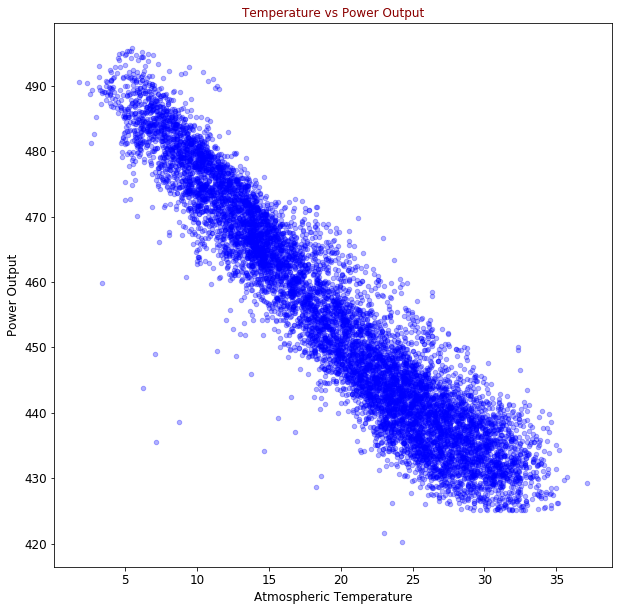

In [142]:
power_plant.plot(x ='AT', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3, 
                fontsize = 12)

plt.title("Temperature vs Power Output", 
          fontsize = 12, color="darkred")
plt.xlabel("Atmospheric Temperature", fontsize = 12) 
plt.ylabel("Power Output", fontsize = 12)
plt.show()

Hoặc cũng có thể tách các thành phần của input rồi vẽ theo outcome

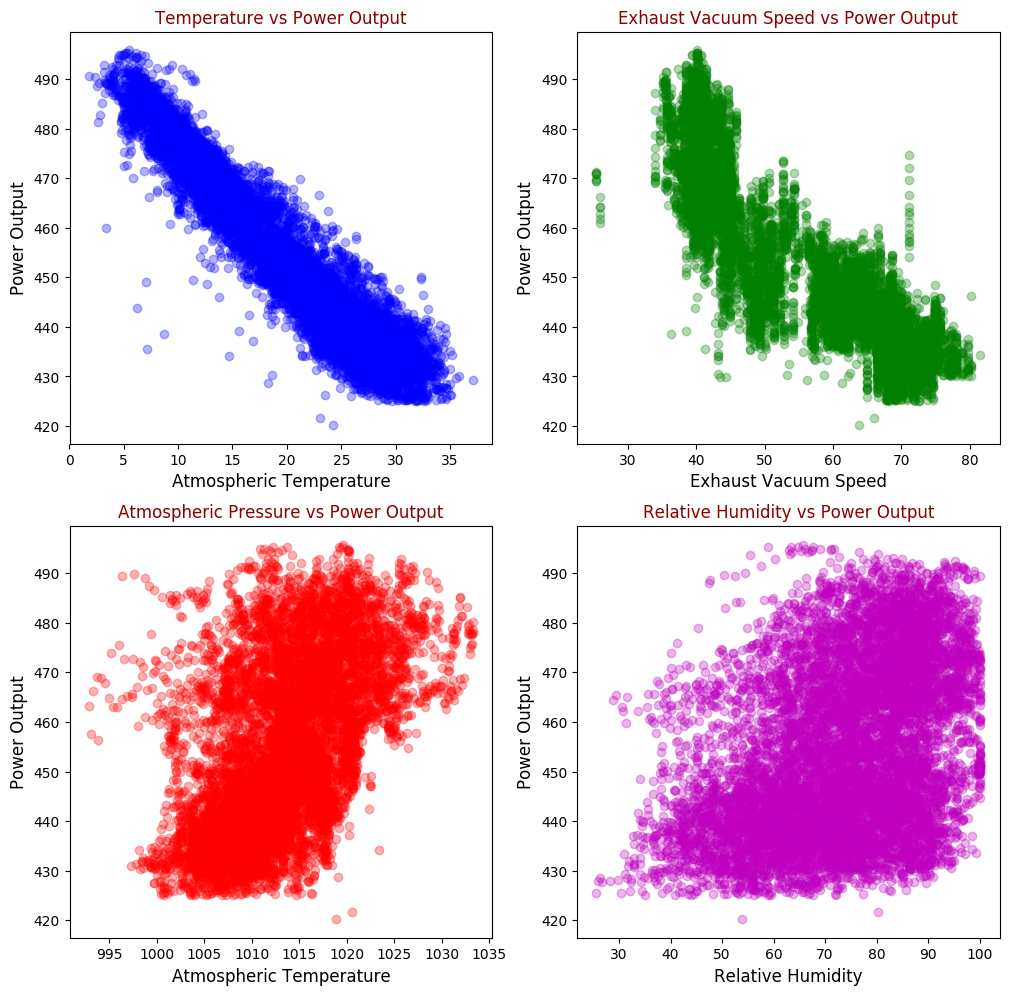

In [143]:
PE = power_plant['PE'].values
V = power_plant['V'].values
AP = power_plant['AP'].values
RH = power_plant['RH'].values
AT = power_plant['AT'].values

#Figure size in pixel: 12x100 each axis = 1200x1200 px.
plt.figure(figsize=(12, 12), dpi=100)

# 4 subplot 2 rows, 2 cols, index 1
plt.subplot(2,2,1)
plt.scatter(AT, PE, color='b', alpha=0.3)
plt.title("Temperature vs Power Output", fontsize = 12, color="darkred")
plt.xlabel("Atmospheric Temperature", fontsize = 12) 
plt.ylabel("Power Output", fontsize = 12)

# index 2
plt.subplot(2,2,2)
plt.scatter(V, PE, color='g', alpha=0.3)
plt.title("Exhaust Vacuum Speed vs Power Output", fontsize = 12, color="darkred")
plt.xlabel("Exhaust Vacuum Speed", fontsize = 12) 
plt.ylabel("Power Output", fontsize = 12)

# index 3
plt.subplot(2,2,3)
plt.scatter(AP, PE, color='r', alpha=0.3)
plt.title("Atmospheric Pressure vs Power Output", fontsize = 12, color="darkred")
plt.xlabel("Atmospheric Temperature", fontsize = 12) 
plt.ylabel("Power Output", fontsize = 12)

# index 4
plt.subplot(2,2,4)
plt.scatter(RH, PE, color='m', alpha=0.3)
plt.title("Relative Humidity vs Power Output", fontsize = 12, color="darkred")
plt.xlabel("Relative Humidity", fontsize = 12) 
plt.ylabel("Power Output", fontsize = 12)

plt.show()


## 3. Data Modeling

In [144]:
# Dùng model_selection helper để chia dữ liệu
from sklearn.model_selection import train_test_split

# Dùng StandardScaler để transform data có mean=0 
# và độ lệch chuẩn standard deviation=1
from sklearn.preprocessing import StandardScaler

# Linear Regression Model 
from sklearn.linear_model import LinearRegression

# Metric: sai số toàn phương trung bình MSE
from sklearn.metrics import mean_squared_error

# Thư viện xử lý ma trận, mảng, ...
import numpy as np

# Hỗ trợ python2, python3 (ví dụ 2/5=0.4 thay vì 2/5=0 như python2) 
from __future__ import division, print_function, unicode_literals

Chúng ta sẽ chia input thành 2 phần, 80% cho training data, 20% cho test data, train_test_split của scikit learn sẽ làm giúp bạn việc này

In [145]:
# Bỏ cột PE (ouput) từ dữ liệu input
X = power_plant.drop("PE", axis = 1).values
print (X)
# Tách PE ra 1 mảng mới.
y = power_plant['PE'].values
# Sau đó transform (chuyển vị) thành vector cột 
y = y.reshape(-1, 1)

# Chia input thành 2 phần, tỉ lệ 0.2 cho test,
# Random state 42 ở đây nghĩa là lần random thứ 2 sẽ giống lần đầu :D
# Có thể xài các số khác 42 cũng OK.
# Trong production code thì bỏ random_state!
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size = 0.2, 
                                               random_state=42)

Training_to_original_ratio = round(X_train.shape[0]/(power_plant.shape[0]), 2) * 100
Testing_to_original_ratio = round(X_test.shape[0]/(power_plant.shape[0]), 2) * 100

print ('Training: {}%; Testing: {}%'.format(Training_to_original_ratio, Testing_to_original_ratio))
list(zip(["Training set", "Testing set"],
   [Training_to_original_ratio, Testing_to_original_ratio]))

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
Training: 80.0%; Testing: 20.0%


[(u'Training set', 80.0), (u'Testing set', 20.0)]

## 4. Linear Regression

Trong bước này, thông thường chúng ta sẽ scale data lại về dạng chuẩn có mean=1 và standard deviation là 1 vì dữ liệu input có nhiều thành phần khác nhau, để bỏ đi các đơn vị, chúng ta dùng StandardScaler.
Sau đó, sử dụng LinearRegression để fit X_train_scaled và y_train


In [146]:
# print(X_train)
std_scale = StandardScaler().fit(X_train)
# print(std_scale)
X_train_scaled = std_scale.transform(X_train)
# print (X_train_scaled)
X_test_scaled = std_scale.transform(X_test)

linear_reg = LinearRegression()
reg_scaled = linear_reg.fit(X_train_scaled, y_train)
y_train_scaled_fit = reg_scaled.predict(X_train_scaled)

print("R-squared for training dataset:{}".
      format(np.round(reg_scaled.score(X_train_scaled, y_train), 2)))
print("Root mean square error: {}".
      format(np.round(np.sqrt(mean_squared_error(y_train, y_train_scaled_fit)), 2)))

# List các coefficients tìm được.
coefficients = reg_scaled.coef_

# Lấy tên các cột trong dữ liệu, sau đó map với coefficients[0]
features = list(power_plant.drop("PE", axis = 1).columns)
print(" ")
print('The coefficients of the features from the linear model:')
print(dict(zip(features, coefficients[0])))
print(" ")
print("The intercept is {}".format(np.round(reg_scaled.intercept_[0],3)))




R-squared for training dataset:0.93
Root mean square error: 4.57
 
The coefficients of the features from the linear model:
{u'AP': 0.36978031656087024, u'RH': -2.312195656068581, u'AT': -14.763927385645413, u'V': -2.949632098561631}
 
The intercept is 454.431


R-squared for test dataset:0.93
Root mean square error for test dataset: 4.5


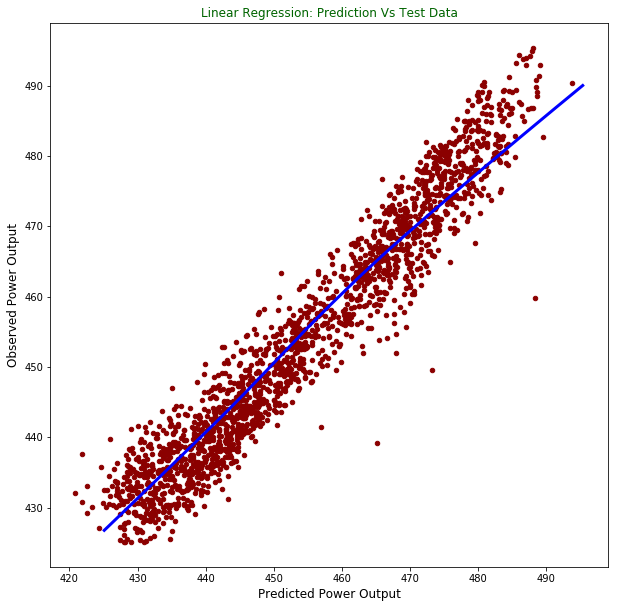

In [148]:
pred = reg_scaled.predict(X_test_scaled)
print("R-squared for test dataset:{}".
      format(np.round(reg_scaled.score(X_test_scaled, y_test), 2)))
print("Root mean square error for test dataset: {}".
      format(np.round(np.sqrt(mean_squared_error(y_test, pred)), 2)))

data =  {"prediction": pred, "observed": y_test}
test = pd.DataFrame(pred, columns = ["Prediction"])
test["Observed"] = y_test

# lowess will return our "smoothed" data
lowess = sm.nonparametric.lowess
z = lowess(pred.flatten(), y_test.flatten())
test.plot(figsize = [10,10],
          x ="Prediction", y = "Observed", kind = "scatter", color = 'darkred')

plt.title("Linear Regression: Prediction Vs Test Data", fontsize = 12, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 12) 
plt.ylabel("Observed Power Output", fontsize = 12)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)

plt.show()
